In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os
import itertools
import numpy.ma as ma
from tqdm import tqdm
import networkx as nx 
import time 
import planarity


In [22]:
# 设定年份
year = 2020

In [23]:
corr = pd.read_csv(f'{year} corr.csv',index_col=0)
corr

,家具制造业,石油加工、炼焦及核燃料加工业,非金属矿物制造业,通用设备制造业,农业,建筑安装业,金属制品业,邮政业,其他制造业,燃气生产和供应业,...,化学纤维制造业,渔业,体育业,新闻和出版业,医药制造业,批发业,互联网和相关服务,软件和信息技术服务业,造纸及纸制品业,其他金融业
家具制造业,1.000000,0.367938,0.526339,0.508388,0.299741,0.240713,0.423515,-0.113025,0.420991,0.390616,...,0.195706,0.214900,0.201365,0.595890,0.464149,0.418169,0.356768,0.468832,0.308996,0.069657
石油加工、炼焦及核燃料加工业,0.367938,1.000000,0.441010,0.642672,0.363503,0.486322,0.332329,0.030835,0.402194,0.587652,...,0.283294,0.338484,0.302070,0.503170,0.294357,0.471558,0.215708,0.388027,0.312210,0.236094
非金属矿物制造业,0.526339,0.441010,1.000000,0.604689,0.401358,0.294217,0.438630,-0.012576,0.404980,0.431606,...,0.231516,0.320237,0.180725,0.461929,0.440320,0.412246,0.378119,0.434393,0.343785,0.170730
通用设备制造业,0.508388,0.642672,0.604689,1.000000,0.475108,0.503182,0.467449,-0.056740,0.506335,0.561244,...,0.343289,0.431218,0.297573,0.622853,0.491376,0.519157,0.466297,0.598889,0.480076,0.138398
农业,0.299741,0.363503,0.401358,0.475108,1.000000,0.250595,0.318180,-0.039388,0.364013,0.380783,...,0.168227,0.496952,0.226212,0.362593,0.356724,0.323143,0.244209,0.330690,0.316529,0.068916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
批发业,0.418169,0.471558,0.412246,0.519157,0.323143,0.424036,0.351793,-0.060462,0.364072,0.470783,...,0.195344,0.360384,0.239716,0.501283,0.527704,1.000000,0.388516,0.497699,0.431595,0.077019
互联网和相关服务,0.356768,0.215708,0.378119,0.466297,0.244209,0.250299,0.352534,0.029313,0.364941,0.267245,...,0.165782,0.180600,0.193001,0.434066,0.518883,0.388516,1.000000,0.538744,0.311080,0.082472
软件和信息技术服务业,0.468832,0.388027,0.434393,0.598889,0.330690,0.457032,0.443669,-0.109272,0.395074,0.358973,...,0.269560,0.273858,0.235167,0.554827,0.479936,0.497699,0.538744,1.000000,0.290212,0.041967
造纸及纸制品业,0.308996,0.312210,0.343785,0.480076,0.316529,0.230906,0.302156,0.051225,0.336118,0.313524,...,0.196676,0.291715,0.155639,0.315915,0.368500,0.431595,0.311080,0.290212,1.000000,0.143115


In [24]:
distance_m = pd.DataFrame(np.tril(np.sqrt(2*(1-corr))))
distance_m.columns=corr.columns
distance_m.index=corr.columns

In [25]:
distance_m

,家具制造业,石油加工、炼焦及核燃料加工业,非金属矿物制造业,通用设备制造业,农业,建筑安装业,金属制品业,邮政业,其他制造业,燃气生产和供应业,...,化学纤维制造业,渔业,体育业,新闻和出版业,医药制造业,批发业,互联网和相关服务,软件和信息技术服务业,造纸及纸制品业,其他金融业
家具制造业,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0
石油加工、炼焦及核燃料加工业,1.124332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0
非金属矿物制造业,0.973305,1.057345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0
通用设备制造业,0.991576,0.845373,0.889170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0
农业,1.183435,1.128270,1.094205,1.024590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
批发业,1.078732,1.028049,1.084209,0.980656,1.163492,1.073279,1.138602,1.456340,1.127766,1.028802,...,1.268587,1.131032,1.233113,0.998716,0.971901,0.000000,0.000000,0.00000,0.00000,0.0
互联网和相关服务,1.134224,1.252431,1.115241,1.033154,1.229464,1.224500,1.137951,1.393332,1.126995,1.210583,...,1.291679,1.280157,1.270432,1.063893,0.980935,1.105879,0.000000,0.00000,0.00000,0.0
软件和信息技术服务业,1.030697,1.106321,1.063585,0.895668,1.156988,1.042083,1.054828,1.489478,1.099933,1.132278,...,1.208669,1.205107,1.236797,0.943582,1.019866,1.002298,0.960475,0.00000,0.00000,0.0
造纸及纸制品业,1.175588,1.172851,1.145613,1.019729,1.169163,1.240237,1.181392,1.377516,1.152286,1.171731,...,1.267536,1.190198,1.299508,1.169688,1.123833,1.066213,1.173814,1.19146,0.00000,0.0


In [26]:
zipped = []
for i in range(len(distance_m.columns)):
    zipped.append(list(zip([distance_m.columns[i]]*distance_m.shape[0],distance_m.index,distance_m[distance_m.columns[i]])))
List_flat = []
for i in zipped:
    for j in i:
        if not np.isnan(j[2]):
            List_flat.append(j)
s_List_flat = list(set(List_flat))
# print(len(s_List_flat))
List = []
for i in range(len(s_List_flat)):
    # print(s_List_flat[i])
    if float(s_List_flat[i][2])!=0:
        List.append(s_List_flat[i])
G = nx.Graph()
G.add_weighted_edges_from(List)
#     return G

def sort_graph_edges_dist(G):
    sorted_edges = []
    tmp = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse = False)
    for source, dest, data in tmp: # in descending order!
        sorted_edges.append({'source': source,
                            'dest': dest,
                            'weight': data['weight']})
    return sorted_edges

def compute_PMFG(G):
    PMFG = nx.Graph() 
    ne_total = G.number_of_edges()
    nb_nodes = len(G.nodes)
    ne_pmfg = 3*(nb_nodes-2)
    sorted_edges = sort_graph_edges_dist(G)
    t0 = time.time()
    for i, edge in enumerate(sorted_edges):
        PMFG.add_edge(edge['source'], edge['dest'], weight = edge['weight'])
        if not planarity.is_planar(PMFG):
            PMFG.remove_edge(edge['source'], edge['dest'])
        ne = PMFG.number_of_edges()
        print("Generating PMFG... added edges in PMFG %d/%d (%.2f%%) lookup edges in G %d/%d (%.2f%%) Elapsed TIme %.2f [sec]"            %(ne, ne_pmfg, (ne/ne_pmfg)*100, i, ne_total, (i+1/ne_total)*100, time.time()-t0), end="\r")
        if ne == ne_pmfg:
            break
    return PMFG

In [27]:
pmfg = compute_PMFG(G)

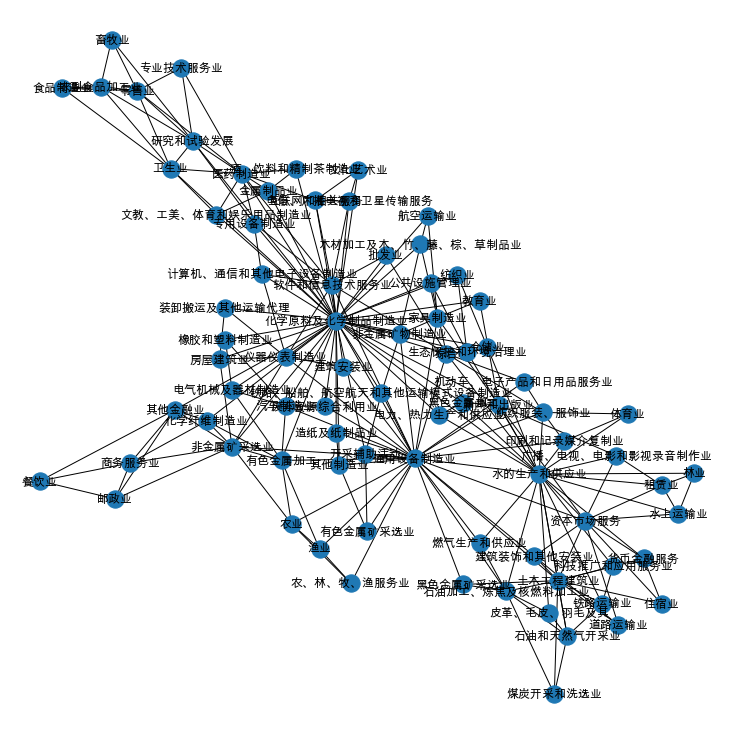

In [28]:
plt.figure(figsize=(10,10))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw(pmfg,with_labels = True)

In [29]:
degree = dict(pmfg.degree())

In [30]:
sorted(degree.items(), key=lambda x:x[1],reverse=True)


[('化学原料及化学制品制造业', 43),
 ('通用设备制造业', 30),
 ('水的生产和供应业', 24),
 ('土木工程建筑业', 13),
 ('资本市场服务', 11),
 ('医药制造业', 11),
 ('软件和信息技术服务业', 11),
 ('非金属矿采选业', 10),
 ('综合', 9),
 ('研究和试验发展', 8),
 ('仪器仪表制造业', 8),
 ('有色金属加工', 8),
 ('石油加工、炼焦及核燃料加工业', 8),
 ('新闻和出版业', 8),
 ('卫生业', 7),
 ('零售业', 7),
 ('家具制造业', 7),
 ('其他金融业', 6),
 ('汽车制造业', 6),
 ('石油和天然气开采业', 6),
 ('生态保护和环境治理业', 6),
 ('纺织服装、服饰业', 6),
 ('商务服务业', 5),
 ('农业', 5),
 ('专用设备制造业', 5),
 ('开采辅助活动', 5),
 ('非金属矿物制造业', 5),
 ('租赁业', 5),
 ('农副食品加工业', 5),
 ('互联网和相关服务', 5),
 ('其他制造业', 5),
 ('化学纤维制造业', 5),
 ('邮政业', 4),
 ('房屋建筑业', 4),
 ('电气机械及器材制造业', 4),
 ('计算机、通信和其他电子设备制造业', 4),
 ('铁路、船舶、航空航天和其他运输模式设备制造业', 4),
 ('仓储业', 4),
 ('水上运输业', 4),
 ('铁路运输业', 4),
 ('货币金融服务', 4),
 ('金属制品业', 4),
 ('木材加工及木、竹、藤、棕、草制品业', 4),
 ('黑色金属加工', 4),
 ('广播、电视、电影和影视录音制作业', 4),
 ('印刷和记录媒介复制业', 4),
 ('文教、工美、体育和娱乐用品制造业', 4),
 ('电信、广播电视和卫星传输服务', 4),
 ('建筑装饰和其他安装业', 4),
 ('渔业', 4),
 ('餐饮业', 3),
 ('农、林、牧、渔服务业', 3),
 ('煤炭开采和洗选业', 3),
 ('橡胶和塑料制造业', 3),
 ('废弃资源综合利用业', 3),
 ('燃气生产和供应业', 3),
 ('批发

In [11]:
file_path = os.listdir('cleaned_data')
file_path = [x[:-4] for x in file_path]

In [12]:
df = pd.read_csv('whole.csv',index_col=0)
df = df[df['year']==year]
nums_one_dustry = {}
for i in range(len(file_path)):
    one_industry = df[df['industry']==file_path[i]]
    nums_one_dustry[f'{file_path[i]}']=len(one_industry['简称'].drop_duplicates())

In [13]:
sorted(nums_one_dustry.items(), key=lambda x:x[1],reverse=True)

[('计算机、通信和其他电子设备制造业', 372),
 ('化学原料及化学制品制造业', 249),
 ('电气机械及器材制造业', 234),
 ('医药制造业', 226),
 ('专用设备制造业', 222),
 ('软件和信息技术服务业', 220),
 ('汽车制造业', 135),
 ('通用设备制造业', 134),
 ('非金属矿物制造业', 92),
 ('零售业', 88),
 ('批发业', 81),
 ('橡胶和塑料制造业', 78),
 ('电力、热力生产和供应业', 77),
 ('有色金属加工', 71),
 ('互联网和相关服务', 67),
 ('土木工程建筑业', 66),
 ('金属制品业', 61),
 ('商务服务业', 56),
 ('铁路、船舶、航空航天和其他运输模式设备制造业', 54),
 ('食品制造业', 53),
 ('资本市场服务', 52),
 ('仪器仪表制造业', 49),
 ('农副食品加工业', 48),
 ('酒、饮料和精制茶制造业', 44),
 ('生态保护和环境治理业', 40),
 ('专业技术服务业', 40),
 ('道路运输业', 39),
 ('货币金融服务', 38),
 ('纺织服装、服饰业', 37),
 ('纺织业', 35),
 ('黑色金属加工', 34),
 ('水上运输业', 30),
 ('造纸及纸制品业', 29),
 ('其他金融业', 28),
 ('燃气生产和供应业', 27),
 ('建筑装饰和其他安装业', 27),
 ('广播、电视、电影和影视录音制作业', 26),
 ('煤炭开采和洗选业', 25),
 ('家具制造业', 24),
 ('化学纤维制造业', 24),
 ('新闻和出版业', 23),
 ('有色金属矿采选业', 22),
 ('其他制造业', 21),
 ('公共设施管理业', 17),
 ('电信、广播电视和卫星传输服务', 17),
 ('开采辅助活动', 17),
 ('石油加工、炼焦及核燃料加工业', 16),
 ('综合', 16),
 ('农业', 15),
 ('航空运输业', 14),
 ('文教、工美、体育和娱乐用品制造业', 14),
 ('水的生产和供应业', 14),
 ('畜牧业', 13),
 ('